In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle//
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download alviansyz/pisang

  0% 0.00/13.3M [00:00<?, ?B/s]
100% 13.3M/13.3M [00:00<00:00, 123MB/s]


In [ ]:
!ls

kaggle.json  pisang.zip  sample_data


In [ ]:
import pandas as pd
import zipfile
zip_ref = zipfile.ZipFile('pisang.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

In [ ]:
pip install split-folders

In [ ]:
import os
import splitfolders

base_dir = '/content/data/'
output_dir = '/content/model'
splitfolders.ratio(base_dir, output=output_dir, seed=1337, ratio=(.8, .2))
train_dir = os.path.join(output_dir, 'train')
validation_dir = os.path.join(output_dir, 'val')

Copying files: 1200 files [00:00, 8494.89 files/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode= 'nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode= 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=32, 
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150, 150), 
    batch_size=32, 
    class_mode='categorical'
)

Found 960 images belonging to 12 classes.
Found 240 images belonging to 12 classes.


In [ ]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import Input
from keras.applications import VGG16

In [ ]:
model = tf.keras.models.Sequential([
                # VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
                VGG16(include_top=False, input_tensor=Input(shape=(150, 150, 3)), pooling='avg'),
                # tf.keras.layers.Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(150, 150, 3)),
                # tf.keras.layers.MaxPool2D(2, 2),
                # tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'),
                # tf.keras.layers.MaxPool2D(2,2),
                # tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'),
                # tf.keras.layers.MaxPool2D(2,2),
                # tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'),
                # tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Flatten(),
                # tf.keras.layers.Dropout(0.5),
                tf.keras.layers.Dense(512, activation='relu'),
                # tf.keras.layers.Dropout(0.25),
                tf.keras.layers.Dense(12, activation='softmax')                              
])

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
class stopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAkurasi telah mencapai 92%!")
      self.model.stop_training = True
callbacks = stopCallback()

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=40,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1
)

Epoch 1/40
25/25 [==============================] - 18s 348ms/step - loss: 2.5458 - accuracy: 0.1111 - val_loss: 2.5166 - val_accuracy: 0.0812
Epoch 2/40
25/25 [==============================] - 8s 324ms/step - loss: 2.4918 - accuracy: 0.1214 - val_loss: 2.4711 - val_accuracy: 0.1375
Epoch 3/40
25/25 [==============================] - 8s 325ms/step - loss: 2.4343 - accuracy: 0.1677 - val_loss: 2.4171 - val_accuracy: 0.1937
Epoch 4/40
25/25 [==============================] - 8s 327ms/step - loss: 2.4047 - accuracy: 0.2017 - val_loss: 2.3795 - val_accuracy: 0.2125
Epoch 5/40
25/25 [==============================] - 8s 322ms/step - loss: 2.3539 - accuracy: 0.2325 - val_loss: 2.3534 - val_accuracy: 0.2188
Epoch 6/40
25/25 [==============================] - 8s 324ms/step - loss: 2.2865 - accuracy: 0.2763 - val_loss: 2.2588 - val_accuracy: 0.2438
Epoch 7/40
25/25 [==============================] - 8s 327ms/step - loss: 2.1939 - accuracy: 0.2712 - val_loss: 2.1869 - val_accuracy: 0.3000
Epoch

Saving pisang raja.jpg to pisang raja.jpg
1.0
pisang raja.jpg
raja


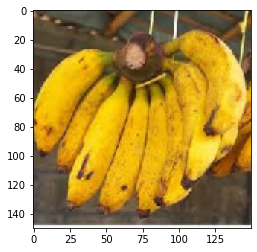

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  #predict images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x= np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax(classes)

    
  print(np.max(classes))

  print(fn)
  if result == 0:
    print('ambon')
  elif result ==1:
    print('barangan')
  elif result ==2:
    print('cavendish')
  elif result ==3:
    print('genderuwo')
  elif result ==4:
    print('javaicecream')
  elif result ==5:
    print('kepok')
  elif result ==6:
    print('mas')
  elif result ==7:
    print('nangka')
  elif result ==8:
    print('raja')
  elif result ==9:
    print('susu')
  elif result ==10:
    print('tanduk')
  elif result ==11:
    print('uli')
  else :
    print('not detected')


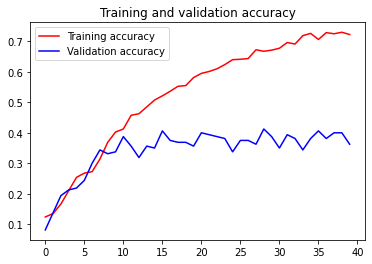

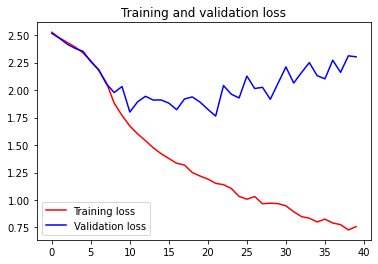

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('deteksi pisang 0.2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpkemwirwv/assets


In [ ]:
history2 = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=10,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1
)

Epoch 1/10
 6/25 [======>.......................] - ETA: 5s - loss: 0.3845 - accuracy: 0.8542WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1224s vs `on_train_batch_end` time: 0.1566s). Check your callbacks.


25/25 [==============================] - 9s 336ms/step - loss: 0.5143 - accuracy: 0.7975 - val_loss: 2.2886 - val_accuracy: 0.4437
Epoch 2/10
25/25 [==============================] - 8s 326ms/step - loss: 0.4976 - accuracy: 0.8050 - val_loss: 2.4842 - val_accuracy: 0.3938
Epoch 3/10
25/25 [==============================] - 8s 327ms/step - loss: 0.5219 - accuracy: 0.8050 - val_loss: 2.6063 - val_accuracy: 0.3688
Epoch 4/10
25/25 [==============================] - 8s 333ms/step - loss: 0.5341 - accuracy: 0.7887 - val_loss: 2.6503 - val_accuracy: 0.3562
Epoch 5/10
25/25 [==============================] - 8s 332ms/step - loss: 0.5206 - accuracy: 0.8025 - val_loss: 2.4602 - val_accuracy: 0.4125
Epoch 6/10
25/25 [==============================] - 8s 327ms/step - loss: 0.4988 - accuracy: 0.8050 - val_loss: 2.7477 - val_accuracy: 0.4000
Epoch 7/10
25/25 [==============================] - 8s 329ms/step - loss: 0.4786 - accuracy: 0.8188 - val_loss: 2.3773 - val_accuracy: 0.4750
Epoch 8/10
25/25 

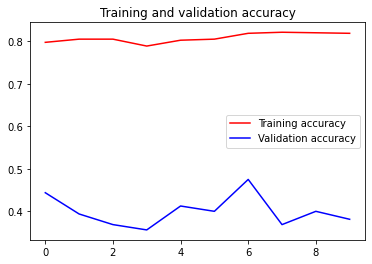

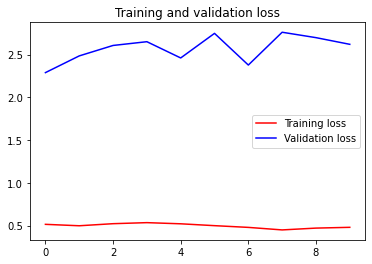

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()